**MIMIC DATASET**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install dask


In [3]:
import zipfile
import os

# Define the base path where your zip files are located
base_path = '/content/drive/My Drive'
zip_files = ['dataset1.zip', 'dataset2.zip', 'dataset3.zip', 'dataset4.zip']

# Define the directory to extract the files
extract_dir = os.path.join(base_path, 'extracted_contents')

# Create the directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzip each dataset
for zip_file in zip_files:
    with zipfile.ZipFile(os.path.join(base_path, zip_file), 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
        print(f"Extracted {zip_file}")


Extracted dataset1.zip
Extracted dataset2.zip
Extracted dataset3.zip
Extracted dataset4.zip


I have reviewed the poe.parquet dataset, which contains detailed information about physician order entries, including order types, sequences, and transaction types. However, I have decided not to include this dataset in my analysis

In [4]:
import dask.dataframe as dd
import pandas as pd

# List of cleaned Parquet files to load with the relevant columns
cleaned_files = {
    'mimiv-iv/omr.parquet': ['subject_id', 'result_value'],
    'mimiv-iv/microbiologyevents.parquet': ['subject_id', 'spec_type_desc'],
    'mimiv-iv/ingredientevents.parquet': ['subject_id', 'amount'],
    'mimiv-iv/inputevents.parquet': ['subject_id', 'patientweight'],
    'mimiv-iv/chartevents.parquet': ['subject_id', 'valuenum'],
    'mimiv-iv/icustays.parquet': ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los'],
    'mimiv-iv/diagnoses_icd.parquet': ['subject_id', 'icd_code'],
    'mimiv-iv/prescriptions.parquet': ['subject_id', 'drug'],
    'mimiv-iv/emar.parquet': ['subject_id', 'medication']
}

# Load, process, remove nulls, and save each file
for file, columns in cleaned_files.items():
    parquet_file_path = os.path.join(extract_dir, file)
    print(f"Processing {file}")
    try:
        # Read the relevant columns from the Parquet file using Dask
        ddf = dd.read_parquet(parquet_file_path, columns=columns)

        # Drop rows with missing values
        ddf_cleaned = ddf.dropna()

        # Save the cleaned data to a new Parquet file
        cleaned_file_path = os.path.join(base_path, 'filtered', f'{file.split("/")[-1].replace(".parquet", "_filtered.parquet")}')
        ddf_cleaned.to_parquet(cleaned_file_path, write_index=False)
        print(f"Cleaned data saved to {cleaned_file_path}")
    except Exception as e:
        print(f"Error processing {file}: {e}")

print("All files processed and cleaned.")


Processing mimiv-iv/omr.parquet
Cleaned data saved to /content/drive/My Drive/filtered/omr_filtered.parquet
Processing mimiv-iv/microbiologyevents.parquet
Cleaned data saved to /content/drive/My Drive/filtered/microbiologyevents_filtered.parquet
Processing mimiv-iv/ingredientevents.parquet
Cleaned data saved to /content/drive/My Drive/filtered/ingredientevents_filtered.parquet
Processing mimiv-iv/inputevents.parquet
Cleaned data saved to /content/drive/My Drive/filtered/inputevents_filtered.parquet
Processing mimiv-iv/chartevents.parquet
Cleaned data saved to /content/drive/My Drive/filtered/chartevents_filtered.parquet
Processing mimiv-iv/icustays.parquet
Cleaned data saved to /content/drive/My Drive/filtered/icustays_filtered.parquet
Processing mimiv-iv/diagnoses_icd.parquet
Cleaned data saved to /content/drive/My Drive/filtered/diagnoses_icd_filtered.parquet
Processing mimiv-iv/prescriptions.parquet
Cleaned data saved to /content/drive/My Drive/filtered/prescriptions_filtered.parque

In [5]:
import dask.dataframe as dd
import os

# Define the directory where your cleaned Parquet files will be saved
filtered_dir = os.path.join(base_path, 'filtered')

# Create the directory if it doesn't exist
if not os.path.exists(filtered_dir):
    os.makedirs(filtered_dir)

# List of cleaned Parquet files to load with the relevant columns
cleaned_files = {
    'mimiv-iv/omr.parquet': ['subject_id', 'result_value'],
    'mimiv-iv/microbiologyevents.parquet': ['subject_id', 'spec_type_desc'],
    'mimiv-iv/ingredientevents.parquet': ['subject_id', 'amount'],
    'mimiv-iv/inputevents.parquet': ['subject_id', 'patientweight'],
    'mimiv-iv/chartevents.parquet': ['subject_id', 'valuenum'],
    'mimiv-iv/icustays.parquet': ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los'],
    'mimiv-iv/diagnoses_icd.parquet': ['subject_id', 'icd_code'],
    'mimiv-iv/prescriptions.parquet': ['subject_id', 'drug'],
    'mimiv-iv/emar.parquet': ['subject_id', 'medication']
}

# Load, process, remove nulls, and save each file
for file, columns in cleaned_files.items():
    parquet_file_path = os.path.join(extract_dir, file)
    print(f"Processing {file}")
    try:
        # Read the relevant columns from the Parquet file using Dask
        ddf = dd.read_parquet(parquet_file_path, columns=columns)

        # Drop rows with missing values
        ddf_cleaned = ddf.dropna()

        # Save the cleaned data to a new Parquet file
        cleaned_file_path = os.path.join(filtered_dir, f'{file.split("/")[-1].replace(".parquet", "_filtered.parquet")}')
        ddf_cleaned.to_parquet(cleaned_file_path, write_index=False)
        print(f"Cleaned data saved to {cleaned_file_path}")
    except Exception as e:
        print(f"Error processing {file}: {e}")

print("All files processed and cleaned.")


Processing mimiv-iv/omr.parquet
Cleaned data saved to /content/drive/My Drive/filtered/omr_filtered.parquet
Processing mimiv-iv/microbiologyevents.parquet
Cleaned data saved to /content/drive/My Drive/filtered/microbiologyevents_filtered.parquet
Processing mimiv-iv/ingredientevents.parquet
Cleaned data saved to /content/drive/My Drive/filtered/ingredientevents_filtered.parquet
Processing mimiv-iv/inputevents.parquet
Cleaned data saved to /content/drive/My Drive/filtered/inputevents_filtered.parquet
Processing mimiv-iv/chartevents.parquet
Cleaned data saved to /content/drive/My Drive/filtered/chartevents_filtered.parquet
Processing mimiv-iv/icustays.parquet
Cleaned data saved to /content/drive/My Drive/filtered/icustays_filtered.parquet
Processing mimiv-iv/diagnoses_icd.parquet
Cleaned data saved to /content/drive/My Drive/filtered/diagnoses_icd_filtered.parquet
Processing mimiv-iv/prescriptions.parquet
Cleaned data saved to /content/drive/My Drive/filtered/prescriptions_filtered.parque

In [7]:
!pip install dask matplotlib seaborn


In [19]:
import os
import pandas as pd

# List of cleaned Parquet files to verify
filtered_files = [
    'omr_filtered.parquet',
    'microbiologyevents_filtered.parquet',
    'ingredientevents_filtered.parquet',
    'inputevents_filtered.parquet',
    'chartevents_filtered.parquet',
    'icustays_filtered.parquet',
    'diagnoses_icd_filtered.parquet',
    'prescriptions_filtered.parquet',
    'emar_filtered.parquet'
]

# Load and display the first few rows of each cleaned file
for file in filtered_files:
    cleaned_file_path = os.path.join(filtered_dir, file)
    try:
        df = pd.read_parquet(cleaned_file_path)
        print(f"\nFirst 3 rows of {file}:")
        print(df.head(3))
    except Exception as e:
        print(f"Error loading {file}: {e}")



First 3 rows of omr_filtered.parquet:
   subject_id result_value
0    10000032       110/65
1    10000032           94
2    10000032         18.0

First 3 rows of microbiologyevents_filtered.parquet:
   subject_id  spec_type_desc
0    10000032    Blood (Toxo)
1    10000032  SEROLOGY/BLOOD
2    10000032  Blood (CMV AB)

First 3 rows of ingredientevents_filtered.parquet:
   subject_id  amount
0    10000032   100.0
1    10000032   100.0
2    10000032   200.0

First 3 rows of inputevents_filtered.parquet:
   subject_id  patientweight
0    10000032      39.400002
1    10000032      39.400002
2    10000032      39.400002

First 3 rows of chartevents_filtered.parquet:
   subject_id  valuenum
0    10000032      82.0
1    10000032      59.0
2    10000032      63.0

First 3 rows of icustays_filtered.parquet:
   subject_id   hadm_id   stay_id                       first_careunit  \
0    10000032  29079034  39553978   Medical Intensive Care Unit (MICU)   
1    10000980  26913865  39765666   Medic

In [13]:
!pip install pandas matplotlib seaborn


In [24]:
import os

# Define the base path where your cleaned Parquet files are located
base_path = '/content/drive/My Drive/filtered'

# List all files in the directory to verify their existence
print("Listing all files in the 'filtered' directory:")
for root, dirs, files in os.walk(base_path):
    for file in files:
        print(os.path.join(root, file))


Listing all files in the 'filtered' directory:
/content/drive/My Drive/filtered/omr_filtered.parquet/part.0.parquet
/content/drive/My Drive/filtered/microbiologyevents_filtered.parquet/part.0.parquet
/content/drive/My Drive/filtered/ingredientevents_filtered.parquet/part.0.parquet
/content/drive/My Drive/filtered/inputevents_filtered.parquet/part.0.parquet
/content/drive/My Drive/filtered/chartevents_filtered.parquet/part.0.parquet
/content/drive/My Drive/filtered/icustays_filtered.parquet/part.0.parquet
/content/drive/My Drive/filtered/diagnoses_icd_filtered.parquet/part.0.parquet
/content/drive/My Drive/filtered/prescriptions_filtered.parquet/part.0.parquet
/content/drive/My Drive/filtered/emar_filtered.parquet/part.0.parquet


In [1]:
!pip install dask pandas matplotlib seaborn


In [2]:
!pip install pandas matplotlib seaborn


In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/My Drive/filtered'

# Correct file paths to 'part.0.parquet' files
cleaned_files = {
    'diagnoses_icd_filtered.parquet/part.0.parquet': ['subject_id', 'icd_code'],
    'icustays_filtered.parquet/part.0.parquet': ['subject_id', 'first_careunit'],
}

# Initialize an empty dictionary to store the Pandas DataFrames
dataframes = {}

# Load a smaller sample (e.g., 2000 rows) from each cleaned Parquet file with Pandas
sample_size = 2000

for file, columns in cleaned_files.items():
    parquet_file_path = os.path.join(base_path, file)
    print(f"Processing {file}")
    try:
        # Read the Parquet file using Pandas and sample a smaller subset
        df = pd.read_parquet(parquet_file_path, columns=columns)
        if not df.empty:
            dataframes[file] = df.head(sample_size)
            print(f"Loaded {file}")
            print(df.head(3))
        else:
            print(f"{file} is empty")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Merge the DataFrames on 'subject_id'
merged_df = None
for df in dataframes.values():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on='subject_id', how='inner')

# Check if merged_df is None before proceeding
if merged_df is None:
    print("No data to merge. Please check your files and paths.")
else:
    # Drop rows with missing values
    merged_df_cleaned = merged_df.dropna()

    # Display the first few rows of the merged and cleaned DataFrame
    print("\nFirst 3 rows of the merged and cleaned DataFrame:")
    print(merged_df_cleaned.head(3))

    # Summary statistics
    print("\nSummary statistics for ICD Code:")
    print(merged_df_cleaned['icd_code'].describe())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing diagnoses_icd_filtered.parquet/part.0.parquet
Loaded diagnoses_icd_filtered.parquet/part.0.parquet
   subject_id icd_code
0    10000032     5723
1    10000032    78959
2    10000032     5715
Processing icustays_filtered.parquet/part.0.parquet
Loaded icustays_filtered.parquet/part.0.parquet
   subject_id                       first_careunit
0    10000032   Medical Intensive Care Unit (MICU)
1    10000980   Medical Intensive Care Unit (MICU)
2    10001217  Surgical Intensive Care Unit (SICU)

First 3 rows of the merged and cleaned DataFrame:
   subject_id icd_code                      first_careunit
0    10000032     5723  Medical Intensive Care Unit (MICU)
1    10000032    78959  Medical Intensive Care Unit (MICU)
2    10000032     5715  Medical Intensive Care Unit (MICU)

Summary statistics for ICD Code:
count     1824
unique     515
top       4019

In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/My Drive/filtered'

# Correct file paths to 'part.0.parquet' files
cleaned_files = {
    'diagnoses_icd_filtered.parquet/part.0.parquet': ['subject_id', 'icd_code'],
    'icustays_filtered.parquet/part.0.parquet': ['subject_id', 'first_careunit'],
}

# Initialize an empty dictionary to store the Pandas DataFrames
dataframes = {}

for file, columns in cleaned_files.items():
    parquet_file_path = os.path.join(base_path, file)
    print(f"Processing {file}")
    try:
        # Read the entire Parquet file using Pandas
        df = pd.read_parquet(parquet_file_path, columns=columns)
        if not df.empty:
            dataframes[file] = df
            print(f"Loaded {file}")
            print(df.head(3))
        else:
            print(f"{file} is empty")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Merge the DataFrames on 'subject_id'
merged_df = None
for df in dataframes.values():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on='subject_id', how='inner')

# Check if merged_df is None before proceeding
if merged_df is None:
    print("No data to merge. Please check your files and paths.")
else:
    # Drop rows with missing values
    merged_df_cleaned = merged_df.dropna()

    # Display the first few rows of the merged and cleaned DataFrame
    print("\nFirst 3 rows of the merged and cleaned DataFrame:")
    print(merged_df_cleaned.head(3))

    # Summary statistics
    print("\nSummary statistics for ICD Code:")
    print(merged_df_cleaned['icd_code'].describe())

    # Summary statistics for the first_careunit column
    print("\nSummary statistics for First Care Unit:")
    print(merged_df_cleaned['first_careunit'].describe())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing diagnoses_icd_filtered.parquet/part.0.parquet
Loaded diagnoses_icd_filtered.parquet/part.0.parquet
   subject_id icd_code
0    10000032     5723
1    10000032    78959
2    10000032     5715
Processing icustays_filtered.parquet/part.0.parquet
Loaded icustays_filtered.parquet/part.0.parquet
   subject_id                       first_careunit
0    10000032   Medical Intensive Care Unit (MICU)
1    10000980   Medical Intensive Care Unit (MICU)
2    10001217  Surgical Intensive Care Unit (SICU)

First 3 rows of the merged and cleaned DataFrame:
   subject_id icd_code                      first_careunit
0    10000032     5723  Medical Intensive Care Unit (MICU)
1    10000032    78959  Medical Intensive Care Unit (MICU)
2    10000032     5715  Medical Intensive Care Unit (MICU)

Summary statistics for ICD Code:
count     6297529
unique      20262
top     

Insulin" is another commonly administered medication in the MICU, followed by "Heparin" and "Ipratropium Bromide Neb least".

PIE CHART OF DISTRUBUTION OF FIRST CARE UNIT

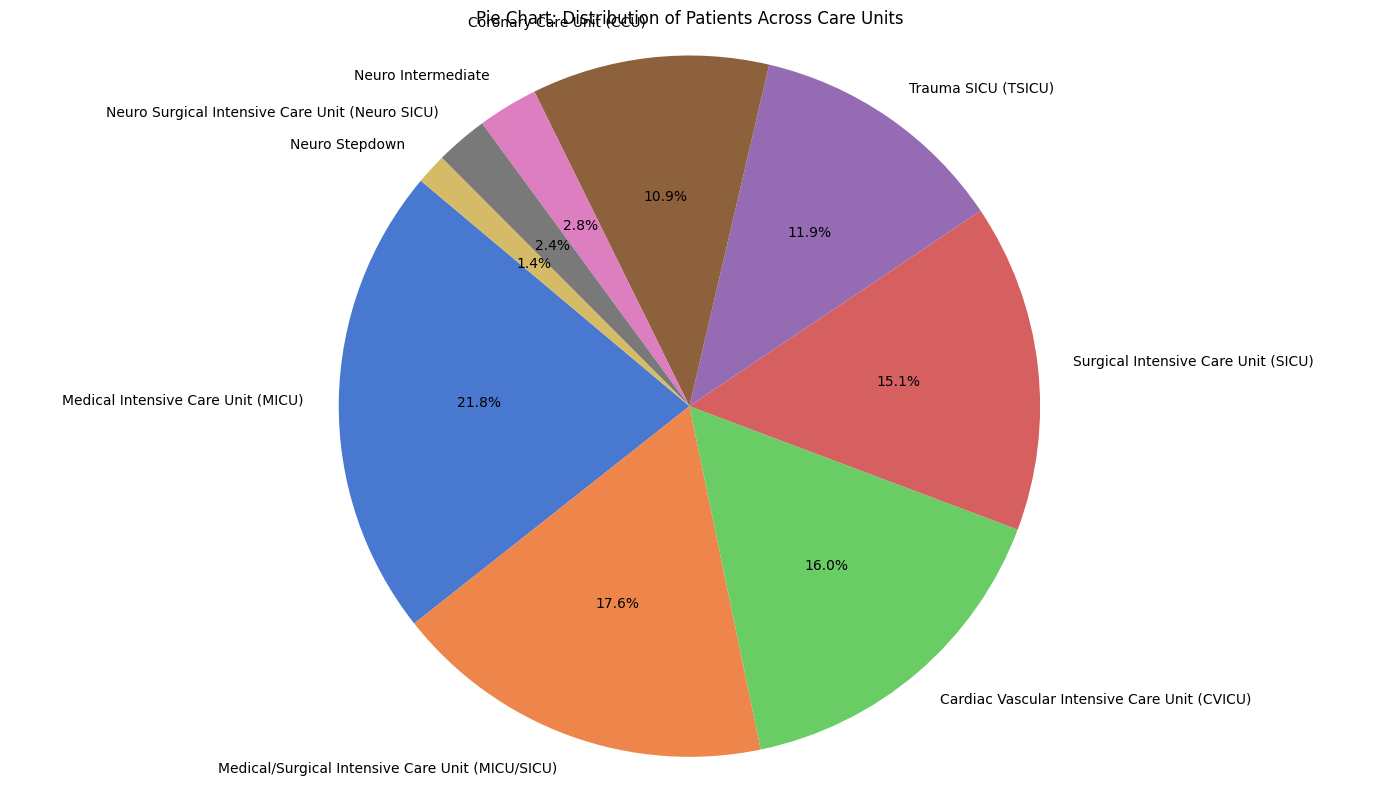

In [18]:
# Calculate the count of patients in each care unit
patient_count_df = merged_df_cleaned['first_careunit'].value_counts().reset_index()
patient_count_df.columns = ['first_careunit', 'count']

# Pie chart for Distribution of Patients Across Care Units
plt.figure(figsize=(14, 8))
plt.pie(patient_count_df['count'], labels=patient_count_df['first_careunit'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Pie Chart: Distribution of Patients Across Care Units')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


#BAR PLOT OF MEDICINES BY FIRST CARE UNIT

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing emar_filtered.parquet/part.0.parquet
Loaded emar_filtered.parquet/part.0.parquet
   subject_id                   medication
0    10000032           Potassium Chloride
1    10000032  Sodium Chloride 0.9%  Flush
2    10000032      Ipratropium Bromide Neb
Processing icustays_filtered.parquet/part.0.parquet
Loaded icustays_filtered.parquet/part.0.parquet
   subject_id                       first_careunit
0    10000032   Medical Intensive Care Unit (MICU)
1    10000980   Medical Intensive Care Unit (MICU)
2    10001217  Surgical Intensive Care Unit (SICU)

First 3 rows of the merged and cleaned DataFrame:
   subject_id                   medication                      first_careunit
0    10000032           Potassium Chloride  Medical Intensive Care Unit (MICU)
1    10000032  Sodium Chloride 0.9%  Flush  Medical Intensive Care Unit (MICU)
2    10000032  

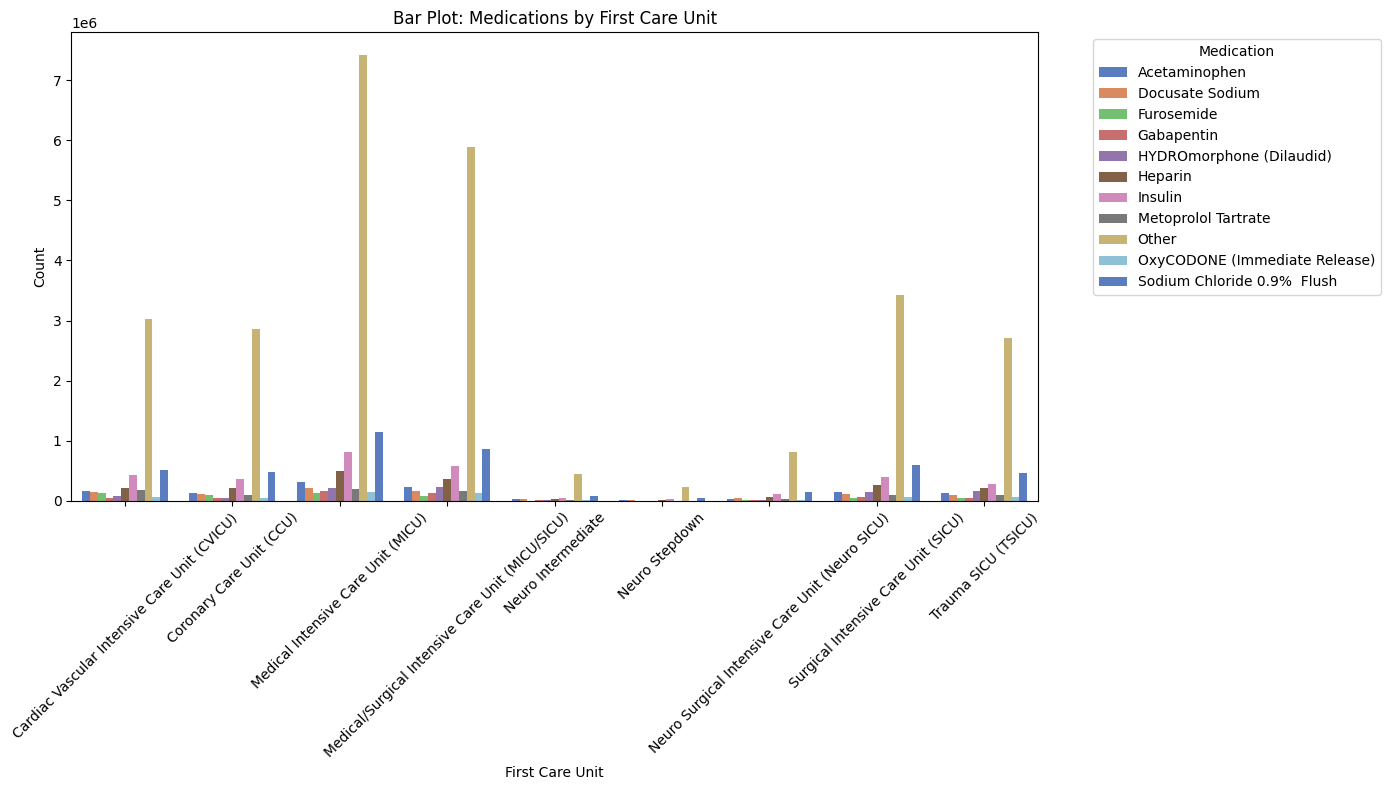

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the base path where your cleaned Parquet files are located
base_path = '/content/drive/My Drive/filtered'

# Correct file paths to 'part.0.parquet' files
cleaned_files = {
    'emar_filtered.parquet/part.0.parquet': ['subject_id', 'medication'],
    'icustays_filtered.parquet/part.0.parquet': ['subject_id', 'first_careunit'],
}

# Initialize an empty dictionary to store the Pandas DataFrames
dataframes = {}

for file, columns in cleaned_files.items():
    parquet_file_path = os.path.join(base_path, file)
    print(f"Processing {file}")
    try:
        # Read the entire Parquet file using Pandas
        df = pd.read_parquet(parquet_file_path, columns=columns)
        if not df.empty:
            dataframes[file] = df
            print(f"Loaded {file}")
            print(df.head(3))
        else:
            print(f"{file} is empty")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Merge the DataFrames on 'subject_id'
merged_df = None
for df in dataframes.values():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on='subject_id', how='inner')

# Check if merged_df is None before proceeding
if merged_df is None:
    print("No data to merge. Please check your files and paths.")
else:
    # Drop rows with missing values
    merged_df_cleaned = merged_df.dropna()

    # Display the first few rows of the merged and cleaned DataFrame
    print("\nFirst 3 rows of the merged and cleaned DataFrame:")
    print(merged_df_cleaned.head(3))

    # Limit the number of unique medications to the top N most frequent ones
    top_n = 10
    top_medications = merged_df_cleaned['medication'].value_counts().index[:top_n]
    merged_df_cleaned['medication'] = merged_df_cleaned['medication'].apply(lambda x: x if x in top_medications else 'Other')

    # Convert to categorical
    merged_df_cleaned['first_careunit'] = merged_df_cleaned['first_careunit'].astype('category')
    merged_df_cleaned['medication'] = merged_df_cleaned['medication'].astype('category')

    # Bar plot for First Care Unit vs. Medications
    plt.figure(figsize=(14, 8))
    sns.countplot(data=merged_df_cleaned, x='first_careunit', hue='medication', palette='muted')
    plt.title('Bar Plot: Medications by First Care Unit')
    plt.xlabel('First Care Unit')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Medication', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing icustays_filtered.parquet/part.0.parquet
Loaded icustays_filtered.parquet/part.0.parquet
   subject_id       los
0    10000032  0.410266
1    10000980  0.497535
2    10001217  1.118032

First 3 rows of the merged and cleaned DataFrame:
   subject_id       los
0    10000032  0.410266
1    10000980  0.497535
2    10001217  1.118032
Median Length of Stay (LOS): 1.93


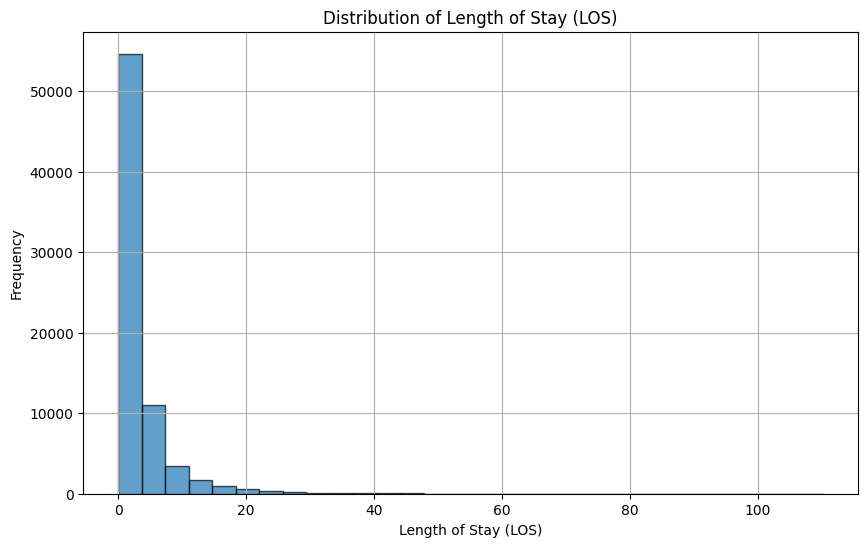

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the base path where your cleaned Parquet files are located
base_path = '/content/drive/My Drive/filtered'

# Correct file paths to 'part.0.parquet' files
cleaned_files = {
    'icustays_filtered.parquet/part.0.parquet': ['subject_id', 'los'],
}

# Initialize an empty dictionary to store the Pandas DataFrames
dataframes = {}

for file, columns in cleaned_files.items():
    parquet_file_path = os.path.join(base_path, file)
    print(f"Processing {file}")
    try:
        # Read the entire Parquet file using Pandas
        df = pd.read_parquet(parquet_file_path, columns=columns)
        if not df.empty:
            dataframes[file] = df
            print(f"Loaded {file}")
            print(df.head(3))
        else:
            print(f"{file} is empty")
    except Exception as e:
        print(f"Error processing {file}: {e}")


if not dataframes:
    print("No data to process. Please check your files and paths.")
else:
    # Concatenate all DataFrames if more than one
    merged_df = pd.concat(dataframes.values(), ignore_index=True)

    # Drop rows with missing values
    merged_df_cleaned = merged_df.dropna()

    # Display the first few rows of the merged and cleaned DataFrame
    print("\nFirst 3 rows of the merged and cleaned DataFrame:")
    print(merged_df_cleaned.head(3))

    # Compute the median LOS
    median_los = merged_df_cleaned['los'].median()
    print(f"Median Length of Stay (LOS): {median_los:.2f}")

    # Plot the distribution of LOS
    plt.figure(figsize=(10, 6))
    plt.hist(merged_df_cleaned['los'], bins=30, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Length of Stay (LOS)')
    plt.xlabel('Length of Stay (LOS)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


#BAR PLOT

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing diagnoses_icd_filtered.parquet/part.0.parquet
Loaded diagnoses_icd_filtered.parquet/part.0.parquet
   subject_id icd_code
0    10000032     5723
1    10000032    78959
2    10000032     5715

First 3 rows of the merged and cleaned DataFrame:
   subject_id icd_code
0    10000032     5723
1    10000032    78959
2    10000032     5715


<ipython-input-24-9f57de89000a>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=icd_code_counts.index, y=icd_code_counts.values, palette='muted')


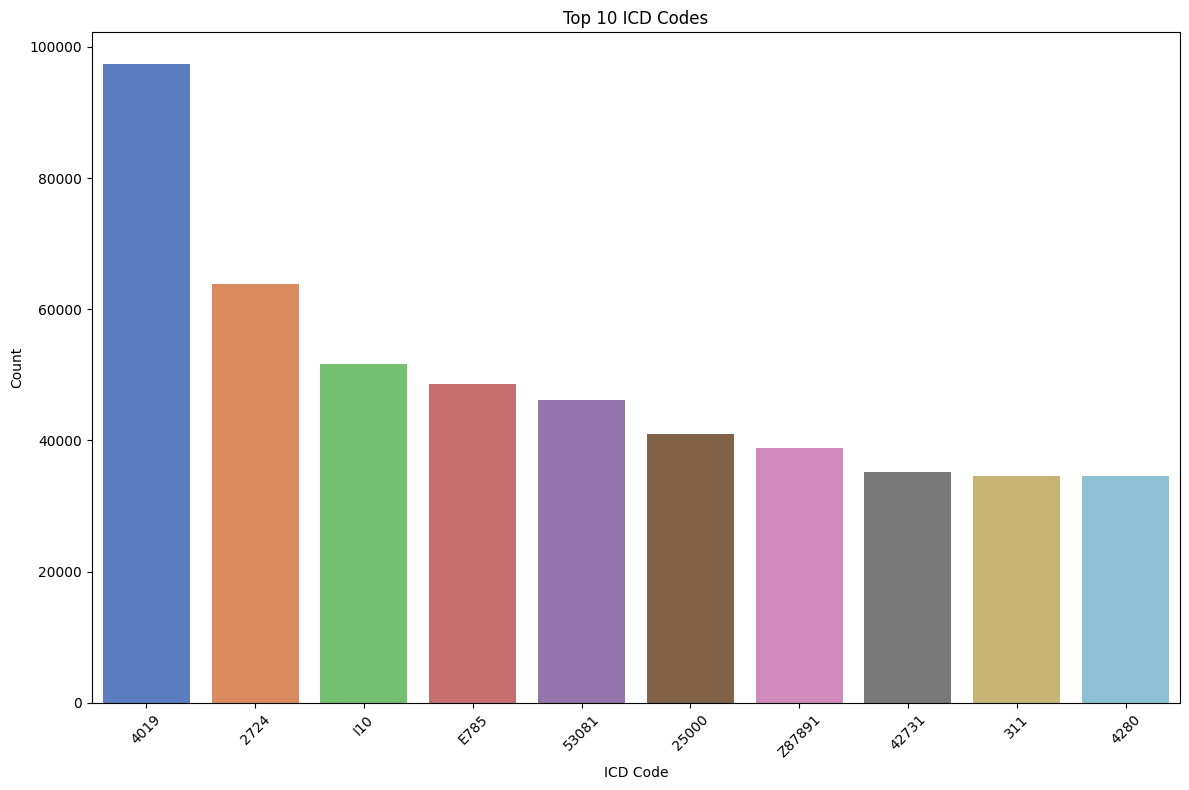

In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/My Drive/filtered'

# Correct file paths to 'part.0.parquet' files
cleaned_files = {
    'diagnoses_icd_filtered.parquet/part.0.parquet': ['subject_id', 'icd_code'],
}

# Initialize an empty dictionary to store the Pandas DataFrames
dataframes = {}

for file, columns in cleaned_files.items():
    parquet_file_path = os.path.join(base_path, file)
    print(f"Processing {file}")
    try:
        # Read the entire Parquet file using Pandas
        df = pd.read_parquet(parquet_file_path, columns=columns)
        if not df.empty:
            dataframes[file] = df
            print(f"Loaded {file}")
            print(df.head(3))
        else:
            print(f"{file} is empty")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Merge the DataFrames on 'subject_id'
merged_df = None
for df in dataframes.values():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on='subject_id', how='inner')

# Check if merged_df is None before proceeding
if merged_df is None:
    print("No data to merge. Please check your files and paths.")
else:
    # Drop rows with missing values
    merged_df_cleaned = merged_df.dropna()

    # Display the first few rows of the merged and cleaned DataFrame
    print("\nFirst 3 rows of the merged and cleaned DataFrame:")
    print(merged_df_cleaned.head(3))

    # Count the occurrences of each ICD code
    icd_code_counts = merged_df_cleaned['icd_code'].value_counts().head(10)

    # Plot the top 10 ICD codes
    plt.figure(figsize=(12, 8))
    sns.barplot(x=icd_code_counts.index, y=icd_code_counts.values, palette='muted')
    plt.title('Top 10 ICD Codes')
    plt.xlabel('ICD Code')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



    ### Key Points:
- **Most Frequent Disease**: Essential (primary) hypertension, unspecified (ICD 4019)
- **Other Common Diseases**:
  - Other and unspecified hyperlipidemia (ICD 2724)
  - Essential (primary) hypertension (ICD I10)
  - Hyperlipidemia, unspecified (ICD E785)
  - Esophageal reflux (ICD 53081)
  - Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled (ICD 25000)
  - Personal history of nicotine dependence (ICD Z87891)
  - Atrial fibrillation (ICD 42731)
  - Depressive disorder, not elsewhere classified (ICD 311)
  - Congestive heart failure, unspecified (ICD 4280)


#CORRELATION MATRIX